<u>Tarea 12<BR>Algoritmos de Clasificación II del Proyecto</u><BR>
Alumno:<BR>
**Sergio Saavedra Campos**

**Conjunto de datos de clasificación estelar - SDSS17**

Clasificación de estrellas, galaxias y cuásares. Sloan Digital Sky Survey DR17

Contexto<BR>
En astronomía, la clasificación estelar es la clasificación de las estrellas en función de sus características espectrales. El esquema de clasificación de galaxias, cuásares y estrellas es uno de los más fundamentales en astronomía. La temprana catalogación de las estrellas y su distribución en el cielo ha llevado a la comprensión de que forman nuestra propia galaxia y, siguiendo la distinción de que Andrómeda era una galaxia separada de la nuestra, numerosas galaxias comenzaron a ser estudiadas a medida que se construyeron telescopios más potentes. Este datasat tiene como objetivo clasificar estrellas, galaxias y cuásares en función de sus características espectrales.

Contenido<BR>
Los datos consisten en 100.000 observaciones del espacio tomadas por el SDSS (Sloan Digital Sky Survey). Cada observación se describe mediante 17 columnas de características y 1 columna de clase que la identifica como una estrella, galaxia o cuásar.
*   obj_ID = Identificador de objeto, el valor único que identifica el objeto en el catálogo de imágenes utilizado por el CAS
*   alfa = Ángulo de ascensión derecha (en la época J2000)
*   delta = Ángulo de declinación (en la época J2000)
*   u = Filtro ultravioleta en el sistema fotométrico
*   g = Filtro verde en el sistema fotométrico
*   r = Filtro rojo en el sistema fotométrico
*   i = Filtro de infrarrojo cercano en el sistema fotométrico
*   z = Filtro infrarrojo en el sistema fotométrico
*   run_ID = Número de ejecución utilizado para identificar el análisis específico
*   rereun_ID = Número de repetición para especificar cómo se procesó la imagen
*   cam_col = Columna de la cámara para identificar la línea de escaneo dentro de la ejecución
*   field_ID = Número de campo para identificar cada campo
*   spec_obj_ID = ID único utilizado para objetos espectroscópicos ópticos (esto significa que 2 observaciones diferentes con el mismo spec_obj_ID deben compartir la clase de salida)
*   corrimiento al rojo = valor de desplazamiento al rojo basado en el aumento de la longitud de onda
*   placa = ID de placa, identifica cada placa en SDSS
*   MJD = Fecha juliana modificada, utilizada para indicar cuándo se tomó una determinada pieza de datos SDSS
*   fiber_ID = ID de fibra que identifica la fibra que apuntaba la luz al plano focal en cada observación
ada observación
*   class = clase de objeto (galaxia, estrella u objeto cuásar)


In [38]:
# Importación librerías
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import datasets, svm, metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree  import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.metrics import accuracy_score 
import xgboost
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from scipy.stats import pearsonr
#import graphviz
import warnings
from time import time
import datetime
import random


%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [3]:
def segundos_a_minutos(segundos):
    horas = int(segundos / 60 / 60)
    segundos -= horas*60*60
    minutos = int(segundos/60)
    segundos -= minutos*60
    return f"{horas:02d}:{minutos:02d}:{segundos:02d}"

In [4]:
url = 'https://raw.githubusercontent.com/brunelboss/coderhouse/main/star_classification.csv'

In [5]:
pd.options.display.max_columns = 0
df = pd.read_csv(url, sep =',', engine='python')
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [6]:
last_column = df.pop('class')   
df.insert(len(df.columns), 'class', last_column) 
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0.634794,5812,56354,171,GALAXY
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0.779136,10445,58158,427,GALAXY
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0.644195,4576,55592,299,GALAXY
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0.932346,9149,58039,775,GALAXY
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0.116123,6121,56187,842,GALAXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,0.000000,9374,57749,438,GALAXY
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,0.404895,7626,56934,866,GALAXY
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,0.143366,2764,54535,74,GALAXY
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,0.455040,6751,56368,470,GALAXY


In [7]:
#Visualizar información DataFrame
print(df.nunique())
print(df.info())
print(df.describe().T)
print(df.describe(include=object).T)

obj_ID          78053
alpha           99999
delta           99999
u               93748
g               92651
r               91901
i               92019
z               92007
run_ID            430
rerun_ID            1
cam_col             6
field_ID          856
spec_obj_ID    100000
redshift        99295
plate            6284
MJD              2180
fiber_ID         1000
class               3
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rer

In [8]:
df = df.drop(df[df['u']<=0].index)

In [9]:
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0.634794,5812,56354,171,GALAXY
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0.779136,10445,58158,427,GALAXY
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0.644195,4576,55592,299,GALAXY
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0.932346,9149,58039,775,GALAXY
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0.116123,6121,56187,842,GALAXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,0.000000,9374,57749,438,GALAXY
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,0.404895,7626,56934,866,GALAXY
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,0.143366,2764,54535,74,GALAXY
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,0.455040,6751,56368,470,GALAXY


In [10]:
df["class"].value_counts()

GALAXY    59445
STAR      21593
QSO       18961
Name: class, dtype: int64

In [11]:
df['class']

0        GALAXY
1        GALAXY
2        GALAXY
3        GALAXY
4        GALAXY
          ...  
99995    GALAXY
99996    GALAXY
99997    GALAXY
99998    GALAXY
99999    GALAXY
Name: class, Length: 99999, dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       99999 non-null  float64
 1   alpha        99999 non-null  float64
 2   delta        99999 non-null  float64
 3   u            99999 non-null  float64
 4   g            99999 non-null  float64
 5   r            99999 non-null  float64
 6   i            99999 non-null  float64
 7   z            99999 non-null  float64
 8   run_ID       99999 non-null  int64  
 9   rerun_ID     99999 non-null  int64  
 10  cam_col      99999 non-null  int64  
 11  field_ID     99999 non-null  int64  
 12  spec_obj_ID  99999 non-null  float64
 13  redshift     99999 non-null  float64
 14  plate        99999 non-null  int64  
 15  MJD          99999 non-null  int64  
 16  fiber_ID     99999 non-null  int64  
 17  class        99999 non-null  object 
dtypes: float64(10), int64(7), object(1)
memory usa

In [13]:
df = df.iloc[:, np.r_[2:18]]
df

,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
0,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0.634794,5812,56354,171,GALAXY
1,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0.779136,10445,58158,427,GALAXY
2,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0.644195,4576,55592,299,GALAXY
3,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0.932346,9149,58039,775,GALAXY
4,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0.116123,6121,56187,842,GALAXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,0.000000,9374,57749,438,GALAXY
99996,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,0.404895,7626,56934,866,GALAXY
99997,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,0.143366,2764,54535,74,GALAXY
99998,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,0.455040,6751,56368,470,GALAXY


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
delta,99999.0,2.413555e+01,1.964461e+01,-1.878533e+01,5.147477e+00,2.364646e+01,3.990158e+01,8.300052e+01
u,99999.0,2.208068e+01,2.251068e+00,1.099623e+01,2.035241e+01,2.217914e+01,2.368748e+01,3.278139e+01
g,99999.0,2.063158e+01,2.037384e+00,1.049820e+01,1.896524e+01,2.109993e+01,2.212378e+01,3.160224e+01
r,99999.0,1.964578e+01,1.854763e+00,9.822070e+00,1.813580e+01,2.012531e+01,2.104479e+01,2.957186e+01
i,99999.0,1.908486e+01,1.757900e+00,9.469903e+00,1.773228e+01,1.940515e+01,2.039651e+01,3.214147e+01
z,99999.0,1.876899e+01,1.765982e+00,9.612333e+00,1.746083e+01,1.900460e+01,1.992112e+01,2.938374e+01
run_ID,99999.0,4.481403e+03,1.964739e+03,1.090000e+02,3.187000e+03,4.188000e+03,5.326000e+03,8.162000e+03
rerun_ID,99999.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02
cam_col,99999.0,3.511625e+00,1.586913e+00,1.000000e+00,2.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
field_ID,99999.0,1.861270e+02,1.490077e+02,1.100000e+01,8.200000e+01,1.460000e+02,2.410000e+02,9.890000e+02


In [15]:
matrix_correlation = df.corr() #corr pearson por default
matrix_correlation.head()

,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
delta,1.000000,-0.026845,-0.007077,-0.006845,-0.004488,-0.006286,-0.301270,NaN,0.032553,-0.173393,0.112322,0.031629,0.112322,0.107330,0.028237
u,-0.026845,1.000000,0.853350,0.728681,0.618346,0.545760,0.131566,NaN,0.007673,-0.013365,0.395856,0.166816,0.395854,0.436346,0.183174
g,-0.007077,0.853350,1.000000,0.932996,0.847046,0.775302,0.151477,NaN,0.007828,-0.022149,0.584317,0.318910,0.584315,0.610809,0.220396
r,-0.006845,0.728681,0.932996,1.000000,0.962868,0.919114,0.153878,NaN,0.008472,-0.026405,0.655243,0.433237,0.655242,0.671180,0.223100
i,-0.004488,0.618346,0.847046,0.962868,1.000000,0.971546,0.147660,NaN,0.007609,-0.026665,0.661640,0.492381,0.661639,0.672522,0.214782


In [16]:
x = 0
for column_headers in df.columns: 
    print(f'{x} - {column_headers}')
    x +=1

0 - delta
1 - u
2 - g
3 - r
4 - i
5 - z
6 - run_ID
7 - rerun_ID
8 - cam_col
9 - field_ID
10 - spec_obj_ID
11 - redshift
12 - plate
13 - MJD
14 - fiber_ID
15 - class


Visualización de Principales Variables vs Class

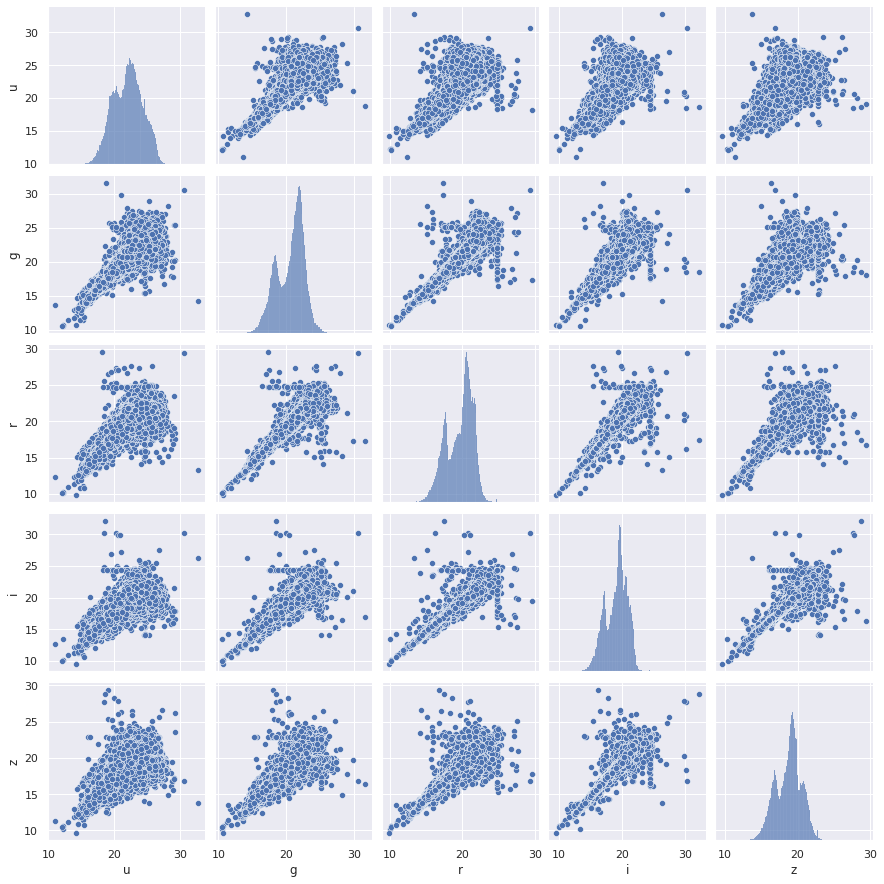

In [17]:
#Pairplots para visualizar las correlaciones 
sns.set()
cols = ['u', 'g', 'r', 'i', 'z']
sns.pairplot(df[cols], height = 2.5)
plt.show();

**Estimación de Clase**<br>
Teniendo definido nuestro dataset, vamos a proceder a crear los modelos solicitados.

In [18]:
X = df.drop(['class'],axis = 1)
y = df['class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=51)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(66999, 15)
(33000, 15)
(66999,)
(33000,)


In [19]:
scaler = MinMaxScaler() 
X_train_mmc = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
X_test_mmc= pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

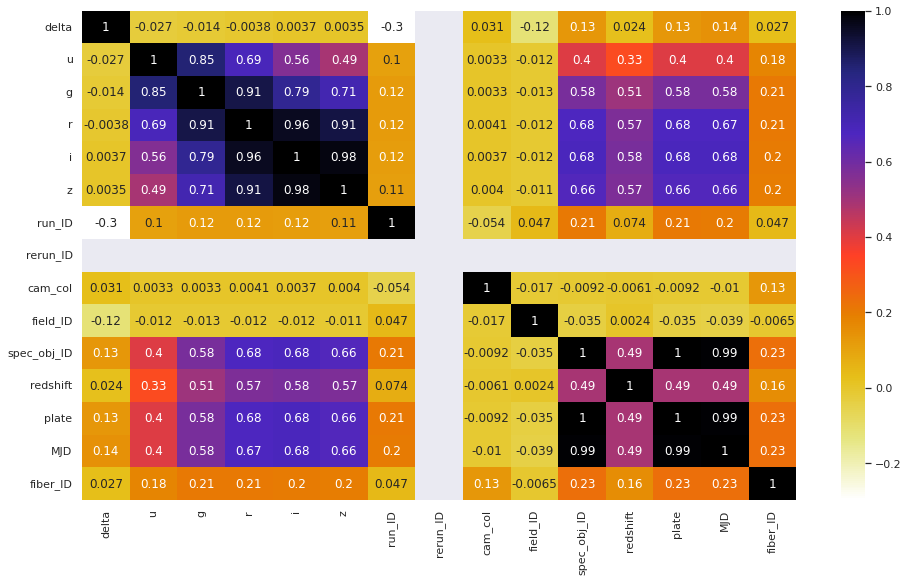

In [20]:
plt.figure(figsize=(16,9))
cor = X_train.corr(method = "spearman")
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r) 
plt.show()

In [21]:
def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr(method = "spearman")
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            #if abs(corr_matrix.iloc[i, j]) > threshold: 
             if (corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [22]:
corr_features = correlation(X_train, 0.85)
len(set(corr_features))

5

In [23]:
corr_features

{'MJD', 'i', 'plate', 'r', 'z'}

In [24]:
X_train.drop(corr_features,axis=1,inplace=True)
X_train_mmc.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_test_mmc.drop(corr_features,axis=1,inplace=True)

In [25]:
print("Shape of X_train = ",X_train.shape)
print("Shape of X_train_mmc = ",X_train.shape)

print("Shape of X_test= ",X_test.shape)
print("Shape of X_test_mmc = ",X_test_mmc.shape)

Shape of X_train =  (66999, 10)
Shape of X_train_mmc =  (66999, 10)
Shape of X_test=  (33000, 10)
Shape of X_test_mmc =  (33000, 10)


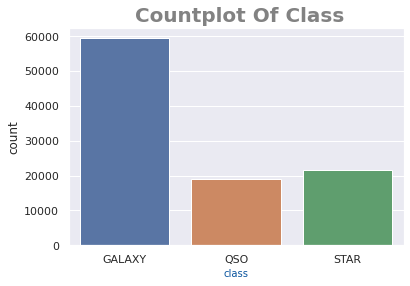

In [26]:
ax = sns.countplot(x="class", data=df)
ax.set_title(" Countplot Of Class", fontdict = { 'fontsize': 20, 'fontweight':'bold'}, color = '#828282')    
ax.set_xlabel("class", fontsize = 10, color = "#0b559f")
plt.show()

In [27]:
# evaluar el modelo usando una condición de prueba dada
def evaluate_model(model, X,y,cv):
	# evaluar el modelo
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# puntuaciones de retorno
	return np.mean(scores), scores.min(), scores.max()

In [28]:
def select_n_splits_kfold(lr_range_fold, up_range_fold):
	folds = range(lr_range_fold,up_range_fold)
	model = LogisticRegression()
	cv = KFold(n_splits=folds[0], shuffle=True, random_state=42)

	ideal, _, _, = evaluate_model(model, X_train_mmc,y_train,cv)

	print('Ideal: %.3f' % ideal)


	means, mins, maxs = list(),list(),list()

	for k in folds:

		cv1 = KFold(n_splits=k, shuffle=True, random_state=42)
		k_mean, k_min, k_max = evaluate_model(model, X_train_mmc,y_train,cv1)
		print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
		means.append(k_mean)
		mins.append(k_mean - k_min)
		maxs.append(k_max - k_mean)
 

	plt.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
	plt.plot(folds, [ideal for _ in range(len(folds))], color='r')
	plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Ideal: 0.934


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

> folds=2, accuracy=0.934 (0.933,0.934)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

> folds=3, accuracy=0.937 (0.936,0.938)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

> folds=4, accuracy=0.938 (0.937,0.940)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

> folds=5, accuracy=0.938 (0.936,0.943)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

> folds=6, accuracy=0.939 (0.936,0.943)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

> folds=7, accuracy=0.939 (0.936,0.942)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

> folds=8, accuracy=0.939 (0.937,0.945)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

> folds=9, accuracy=0.939 (0.935,0.946)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

> folds=10, accuracy=0.940 (0.936,0.947)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

> folds=11, accuracy=0.940 (0.934,0.946)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

> folds=12, accuracy=0.940 (0.934,0.945)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

> folds=13, accuracy=0.940 (0.934,0.945)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

> folds=14, accuracy=0.940 (0.934,0.947)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

> folds=15, accuracy=0.940 (0.933,0.946)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

> folds=16, accuracy=0.940 (0.934,0.946)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

> folds=17, accuracy=0.940 (0.933,0.947)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

> folds=18, accuracy=0.940 (0.931,0.947)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

> folds=19, accuracy=0.940 (0.935,0.947)


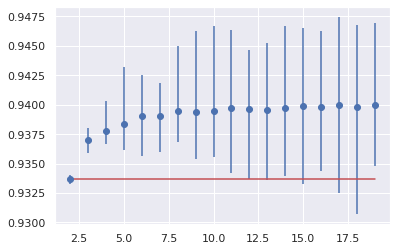

In [29]:
select_n_splits_kfold(2,20)

In [30]:
kfold_validation=KFold(n_splits=8,random_state=42, shuffle=True)

In [31]:
def display_pred_in_df(y_test,y_pred,name):
  y_pred_new = pd.Series(y_pred, name=name)
  y_pred_new.reset_index(drop=True, inplace=True)
  y_test_new = y_test.copy()  
  y_test_new.reset_index(drop=True, inplace=True) 
  pred_df = pd.concat([y_pred_new, y_test_new], axis=1)  
  return pred_df

In [32]:
# Esta función se utiliza para imprimir métricas de rendimiento para problemas de clasificación.
def display_performance_metrics(y_test,y_pred,score):
  print("\033[1maccuracy score mean = ", np.mean(score).round(4),"\033[0m")
  cm = confusion_matrix(y_test,y_pred)
  # 0 - Galaxy
  # 1 - QSO
  # 2 - Star
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap="YlGn");  

  # etiquetas, título y ticks 
  ax.set_xlabel('Predicted labels',fontweight = "bold");ax.set_ylabel('Actual labels',fontweight = "bold"); 
  ax.set_title('Confusion Matrix For Multi-Class [Galaxy, QSO, Star]', fontsize = 15,fontweight = "bold", color = '#828282');   
  plt.show()

  print("\033[1maccuracy_score = ",accuracy_score(y_test,y_pred),"\033[0m")
  print("\n\033[1mclassification_report\033[0m")
  print(classification_report(y_test,y_pred))
  return

In [33]:
grid_params = { 
                'leaf_size' : np.array([30,36,40,44]),
                'n_neighbors' : np.array([5,7,9]),
               'algorithm' : np.array(['auto', 'ball_tree', 'kd_tree', 'brute']),  
               'weights' : np.array(['uniform','distance']),              
               'metric' : np.array(['minkowski','euclidean','manhattan'])}

In [34]:
print(grid_params)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, grid_params, cv=kfold_validation)
#Fit the model
gs_knn_2 = clf.fit(X_train,y_train)

{'leaf_size': array([30, 36, 40, 44]), 'n_neighbors': array([5, 7, 9]), 'algorithm': array(['auto', 'ball_tree', 'kd_tree', 'brute'], dtype='<U9'), 'weights': array(['uniform', 'distance'], dtype='<U8'), 'metric': array(['minkowski', 'euclidean', 'manhattan'], dtype='<U9')}


In [35]:
gs_knn_2.best_score_

0.7075476991683569

In [36]:
# A veces muestra n_neighbors= 5 y n_neighbors= 9 pero después de observar n_neighbors= 5 es mejor
knn_hpt = KNeighborsClassifier(n_neighbors= 5,leaf_size = 30 ,algorithm = 'auto', weights = 'uniform',metric = 'manhattan',p = 1)
scores = cross_val_score(knn_hpt,X=X_train_mmc,y=y_train,cv=kfold_validation)
print(scores)
print(np.mean(scores))

[0.87104478 0.87701493 0.88334328 0.87785075 0.87928358 0.88358209
 0.87653731 0.87628374]
0.8781175564736623


accuracy score mean =  0.8573 


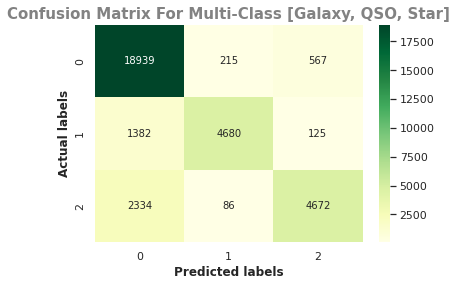

accuracy_score =  0.8573030303030303 

classification_report
              precision    recall  f1-score   support

      GALAXY       0.84      0.96      0.89     19721
         QSO       0.94      0.76      0.84      6187
        STAR       0.87      0.66      0.75      7092

    accuracy                           0.86     33000
   macro avg       0.88      0.79      0.83     33000
weighted avg       0.86      0.86      0.85     33000



,class_Prediction,class
0,GALAXY,GALAXY
1,STAR,GALAXY
2,GALAXY,GALAXY
3,GALAXY,GALAXY
4,QSO,QSO


In [39]:
knn_y_pred = cross_val_predict(knn_hpt, X_test_mmc, y_test, cv=kfold_validation)
score = cross_val_score(knn_hpt, X_test_mmc, y_test, cv=kfold_validation)
 
display_performance_metrics(y_test,knn_y_pred,score)

knn_df = display_pred_in_df(y_test,knn_y_pred,"class_Prediction")
knn_df.head()